In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

secretnumber = '0110110'

In [2]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

circuit.h(range(len(secretnumber))) #circuit.h([0,1,2,3,4,5])
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):      #circuit.cx(5, 6)
    if yesno == '1':                                     #circuit.cx(3, 6)
        circuit.cx(ii, len(secretnumber))                #circuit.cx(0, 6)
               
circuit.barrier()
circuit.h(range(len(secretnumber))) #circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

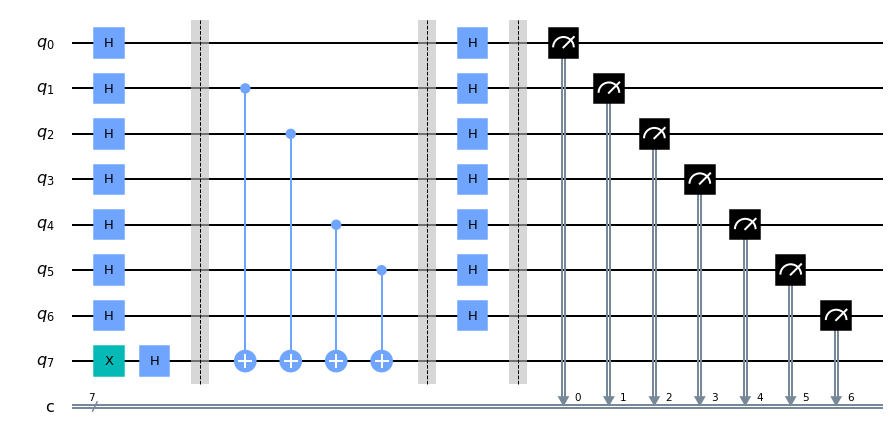

In [3]:
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'0110110': 1}


In [5]:
circuit.qasm(True)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg c[7];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
x q[7];
h q[7];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7];
cx q[1],q[7];
cx q[2],q[7];
cx q[4],q[7];
cx q[5],q[7];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
measure q[6] -> c[6];

